In [1]:
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

In [4]:
import pandas as pd
import thinkplot
import pylab as pl
import thinkstats2
import scipy.stats
import numpy as np

from pandas import *

In [5]:
Data = pd.read_csv('cancerPatientDataSets.csv')

In [6]:
Data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
Data.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [8]:
Data.columns=['Patient_ID', 'Age','Gender','Air_Pollution','Alcohol_use', 'Dust Allergy', 'OccuPational_Hazards',
                'Genetic_Risk','chronic Lung Disease', 'Balanced_Diet', 'Obesity', 'Smoking', 'Passive_Smoker',
                'Chest_Pain', 'Coughing_of_Blood', 'Fatigue', 'Weight_Loss', 'Shortness_of_Breath', 'Wheezing',
                'Swallowing_Difficulty', 'Clubbing_of_Finger_Nails', 'Frequent_Cold', 'Dry_Cough', 'Snoring', 'Level']

Text(0, 0.5, 'Individuals')

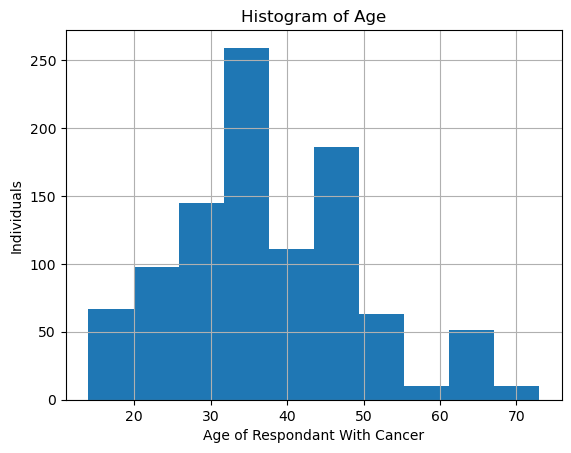

In [9]:
Data.hist('Age')
pl.title("Histogram of Age")
pl.xlabel("Age of Respondant With Cancer")
pl.ylabel("Individuals")

Text(0, 0.5, 'Individuals')

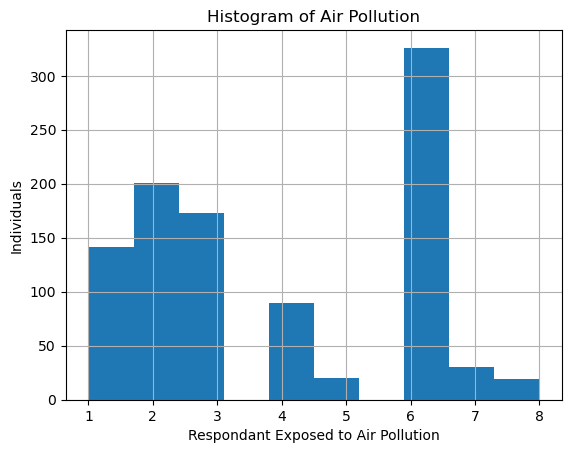

In [10]:
Data.hist('Air_Pollution')
pl.title("Histogram of Air Pollution")
pl.xlabel("Respondant Exposed to Air Pollution")
pl.ylabel("Individuals")

Text(0, 0.5, 'Individuals')

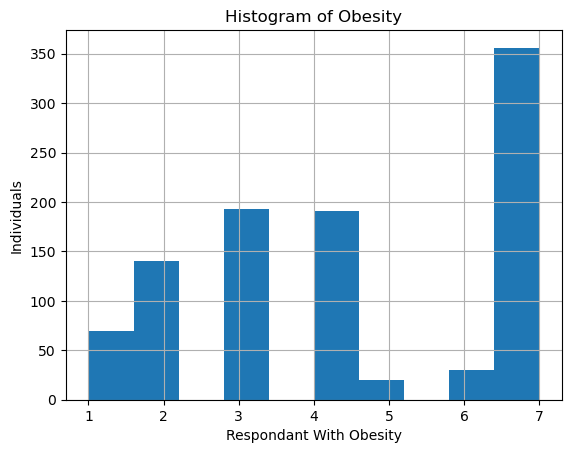

In [11]:
Data.hist('Obesity')
pl.title("Histogram of Obesity")
pl.xlabel("Respondant With Obesity")
pl.ylabel("Individuals")

Text(0, 0.5, 'Individuals')

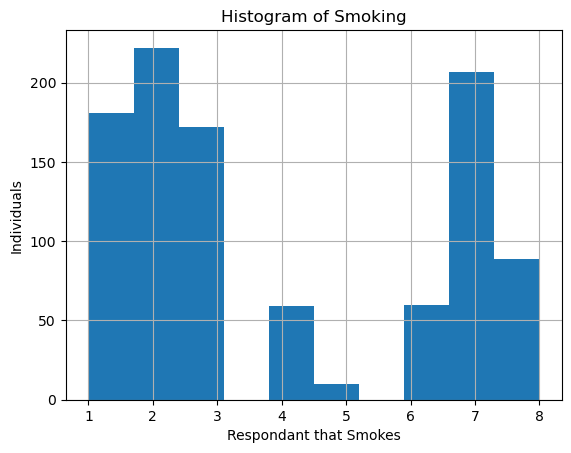

In [12]:
Data.hist('Smoking')
pl.title("Histogram of Smoking")
pl.xlabel("Respondant that Smokes")
pl.ylabel("Individuals")

Text(0, 0.5, 'Individuals')

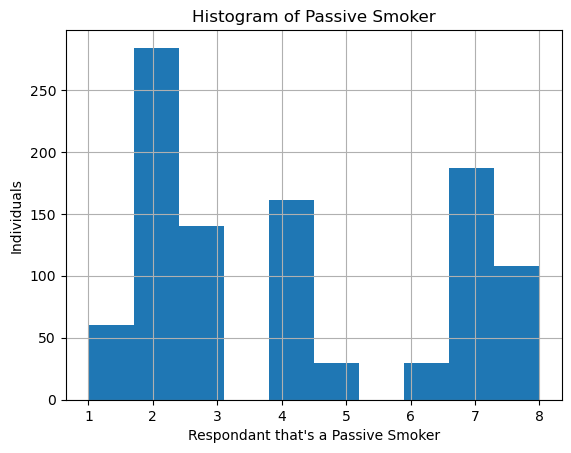

In [13]:
Data.hist('Passive_Smoker')
pl.title("Histogram of Passive Smoker")
pl.xlabel("Respondant that's a Passive Smoker")
pl.ylabel("Individuals")

## PMF

In [14]:
smoker = Data.Smoking
smoker.head()

0    3
1    2
2    2
3    7
4    8
Name: Smoking, dtype: int64

In [15]:
age = Data.Age

In [16]:
passiveSmoker = Data.Passive_Smoker

In [17]:
pollution = Data.Air_Pollution

In [18]:
obesity = Data.Obesity

In [19]:
pmf = thinkstats2.Pmf(smoker)
pmf

Pmf({2: 0.222, 7: 0.20700000000000002, 1: 0.181, 3: 0.17200000000000001, 8: 0.089, 6: 0.06, 4: 0.059000000000000004, 5: 0.01})

In [20]:
pmf2 = thinkstats2.Pmf(age)
pmf2

Pmf({35: 0.077, 33: 0.069, 38: 0.069, 37: 0.051000000000000004, 44: 0.051000000000000004, 27: 0.048, 45: 0.042, 48: 0.04, 26: 0.037, 28: 0.032, 52: 0.031, 32: 0.031, 24: 0.03, 25: 0.03, 62: 0.03, 46: 0.023, 39: 0.021, 36: 0.021, 47: 0.02, 42: 0.02, 19: 0.02, 17: 0.02, 53: 0.019, 22: 0.019, 23: 0.019, 29: 0.019, 18: 0.018000000000000002, 55: 0.011, 73: 0.01, 34: 0.01, 65: 0.01, 64: 0.01, 61: 0.01, 49: 0.01, 14: 0.009000000000000001, 31: 0.009000000000000001, 43: 0.001, 51: 0.001, 54: 0.001, 63: 0.001})

In [21]:
pmf3 = thinkstats2.Pmf(passiveSmoker)

In [22]:
pmf4 = thinkstats2.Pmf(pollution)

In [23]:
pmf5 = thinkstats2.Pmf(obesity)

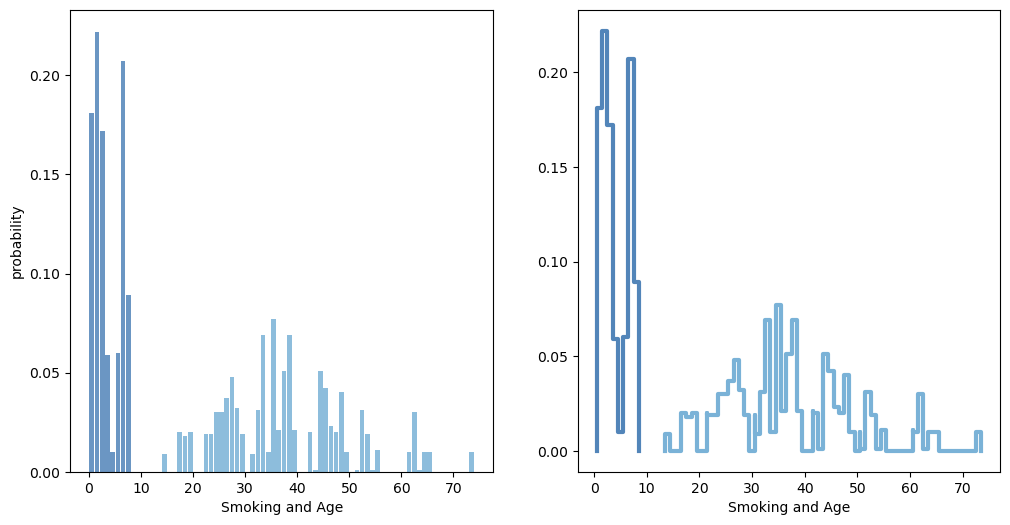

<Figure size 800x600 with 0 Axes>

In [24]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf, align='right')
thinkplot.Hist(pmf2, align='left')
thinkplot.Config(xlabel='Smoking and Age', ylabel='probability')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf, pmf2])
thinkplot.Show(xlabel='Smoking and Age')

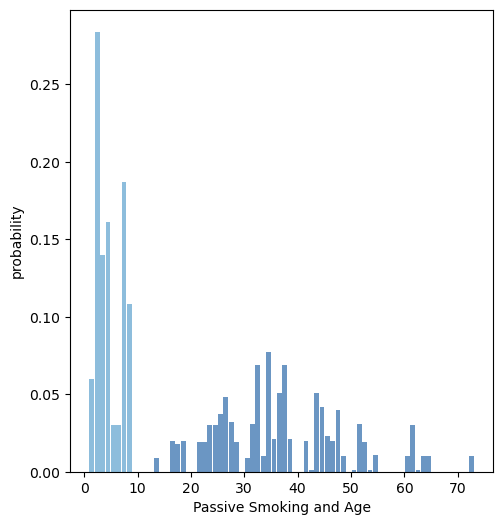

In [25]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf2, align='right')
thinkplot.Hist(pmf3, align='left')
thinkplot.Config(xlabel='Passive Smoking and Age', ylabel='probability')

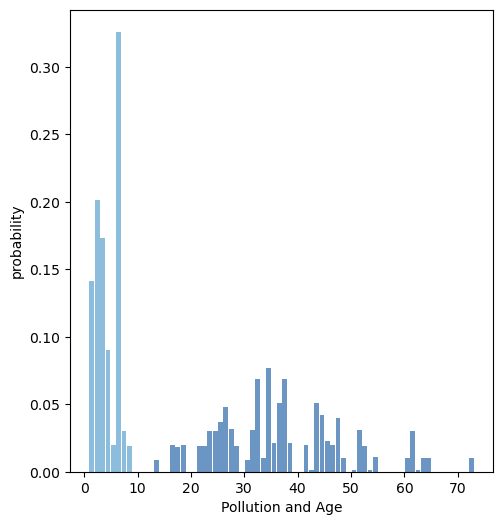

In [26]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf2, align='right')
thinkplot.Hist(pmf4, align='left')
thinkplot.Config(xlabel='Pollution and Age', ylabel='probability')

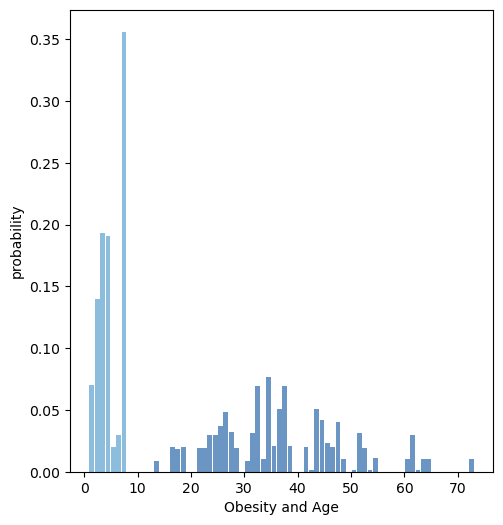

In [27]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf2, align='right')
thinkplot.Hist(pmf5, align='left')
thinkplot.Config(xlabel='Obesity and Age', ylabel='probability')

## CDF

In [28]:
cdf = thinkstats2.Cdf(pmf)

In [29]:
cdf2 = thinkstats2.Cdf(pmf2)

In [30]:
cdf3 = thinkstats2.Cdf(pmf3)

In [31]:
cdf4 = thinkstats2.Cdf(pmf4)

In [32]:
cdf5 = thinkstats2.Cdf(pmf5)

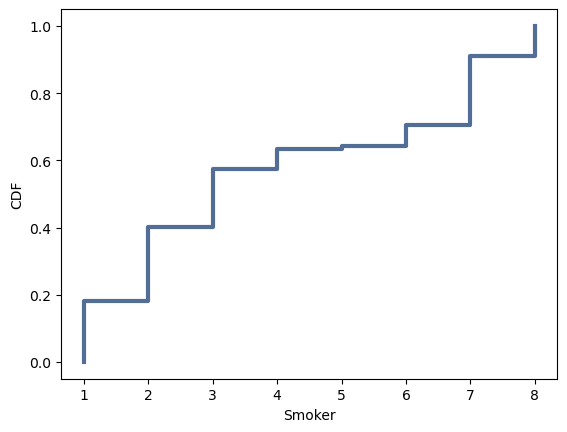

<Figure size 800x600 with 0 Axes>

In [33]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel="Smoker", ylabel="CDF")


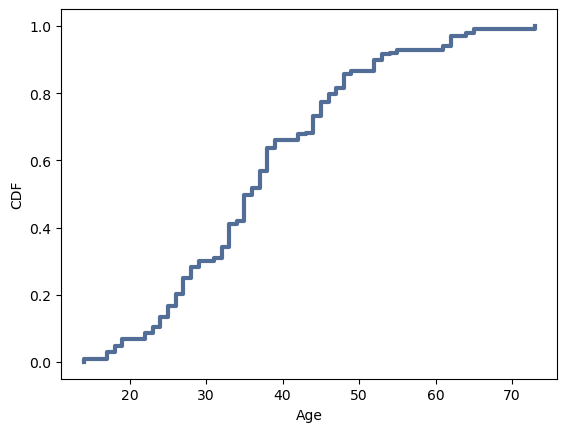

<Figure size 800x600 with 0 Axes>

In [34]:
thinkplot.Cdf(cdf2)
thinkplot.Show(xlabel="Age", ylabel="CDF")

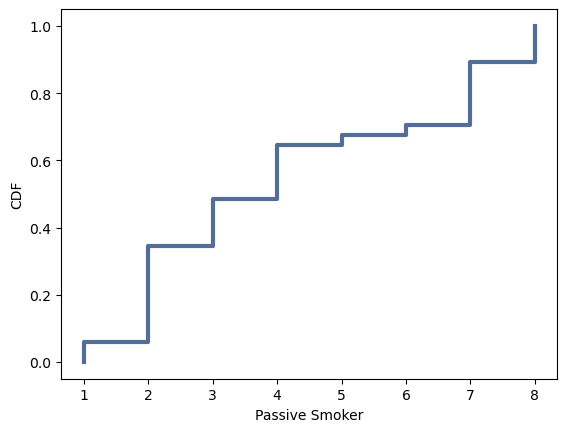

<Figure size 800x600 with 0 Axes>

In [35]:
thinkplot.Cdf(cdf3)
thinkplot.Show(xlabel="Passive Smoker", ylabel="CDF")

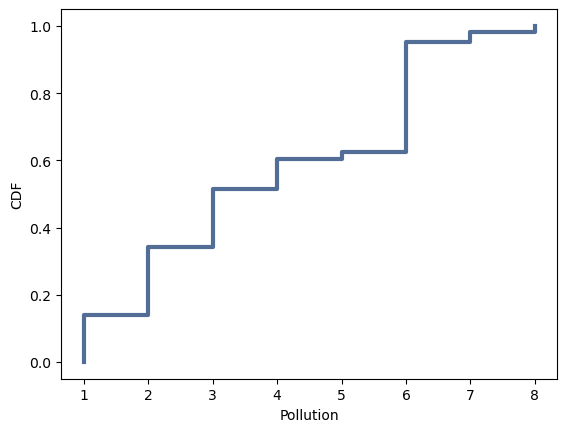

<Figure size 800x600 with 0 Axes>

In [36]:
thinkplot.Cdf(cdf4)
thinkplot.Show(xlabel="Pollution", ylabel="CDF")

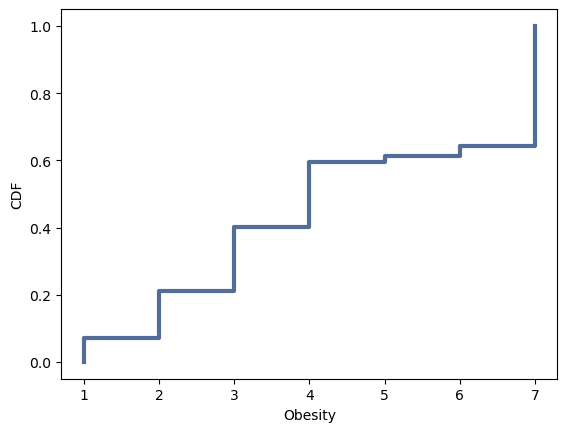

<Figure size 800x600 with 0 Axes>

In [37]:
thinkplot.Cdf(cdf5)
thinkplot.Show(xlabel="Obesity", ylabel="CDF")

## Distribution

Mean, Var 37.04183673469388 128.46457621824246
Sigma 11.334221465025397


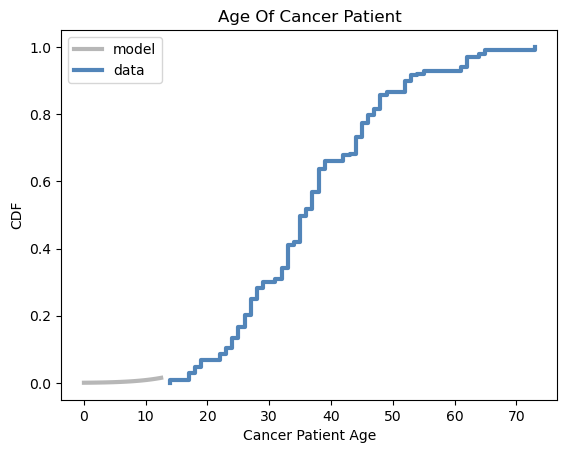

In [38]:
mu, var = thinkstats2.TrimmedMeanVar(age, p=0.01)
print("Mean, Var", mu, var)

sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

cdf = thinkstats2.Cdf(age, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Age Of Cancer Patient", xlabel="Cancer Patient Age", ylabel="CDF")

Mean, Var 3.936734693877551 6.093956684714703
Sigma 2.4685940704608975


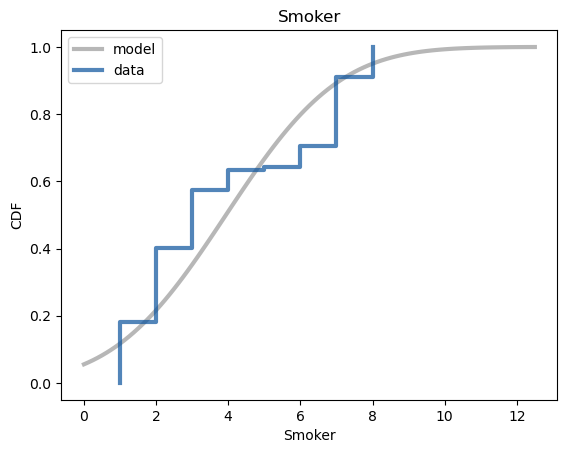

In [39]:
mu, var = thinkstats2.TrimmedMeanVar(smoker, p=0.01)
print("Mean, Var", mu, var)

sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

cdf = thinkstats2.Cdf(smoker, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Smoker", xlabel="Smoker", ylabel="CDF")

Mean, Var 4.188775510204081 5.195996459808458
Sigma 2.2794728469118595


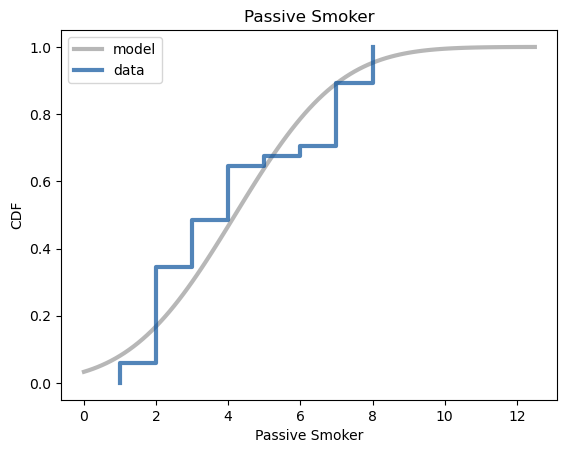

In [40]:
mu, var = thinkstats2.TrimmedMeanVar(passiveSmoker, p=0.01)
print("Mean, Var", mu, var)

sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

cdf = thinkstats2.Cdf(passiveSmoker, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Passive Smoker", xlabel="Passive Smoker", ylabel="CDF")

Mean, Var 3.826530612244898 3.9433777592669563
Sigma 1.9857939871162256


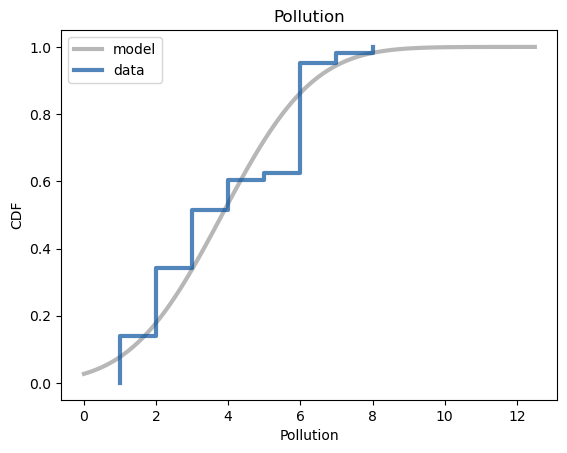

In [41]:
mu, var = thinkstats2.TrimmedMeanVar(pollution, p=0.01)
print("Mean, Var", mu, var)

sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

cdf = thinkstats2.Cdf(pollution, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Pollution", xlabel="Pollution", ylabel="CDF")

Mean, Var 4.474489795918367 4.4146553519367
Sigma 2.1011081247610033


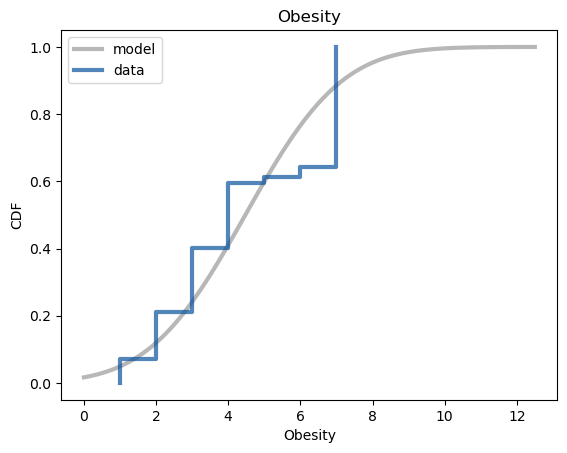

In [42]:
mu, var = thinkstats2.TrimmedMeanVar(obesity, p=0.01)
print("Mean, Var", mu, var)

sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label="model", color="0.6")

cdf = thinkstats2.Cdf(obesity, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Obesity", xlabel="Obesity", ylabel="CDF")

## Scatter Plots

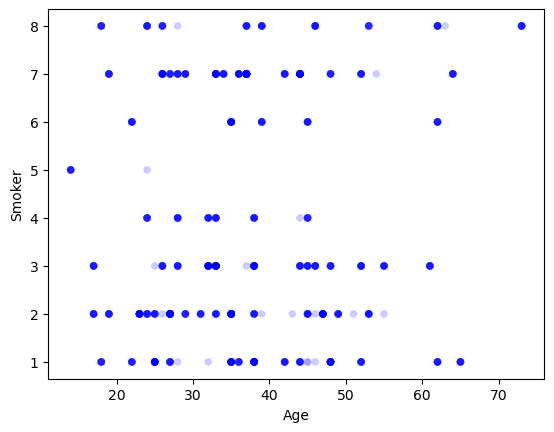

<Figure size 800x600 with 0 Axes>

In [43]:
thinkplot.Scatter(age, smoker)
thinkplot.Show(xlabel='Age', ylabel='Smoker')

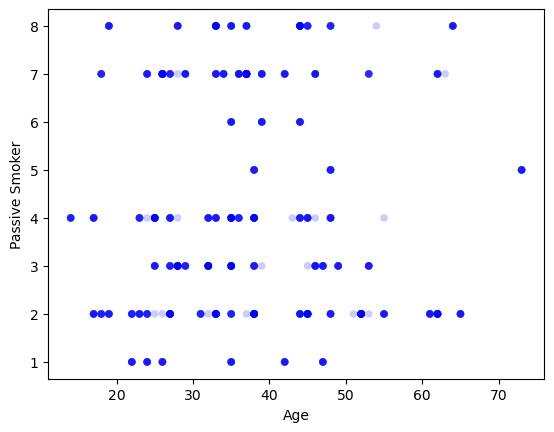

<Figure size 800x600 with 0 Axes>

In [44]:
thinkplot.Scatter(age, passiveSmoker)
thinkplot.Show(xlabel='Age', ylabel='Passive Smoker')

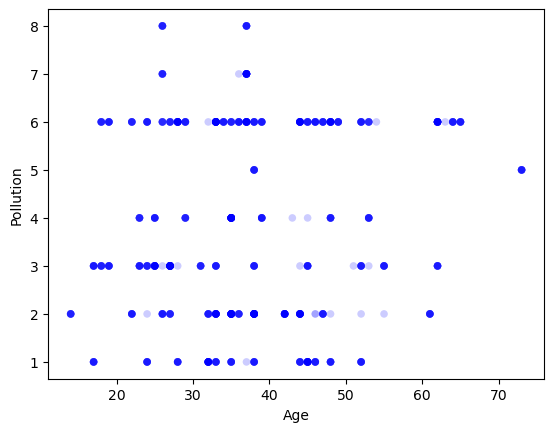

<Figure size 800x600 with 0 Axes>

In [45]:
thinkplot.Scatter(age, pollution)
thinkplot.Show(xlabel='Age', ylabel='Pollution')

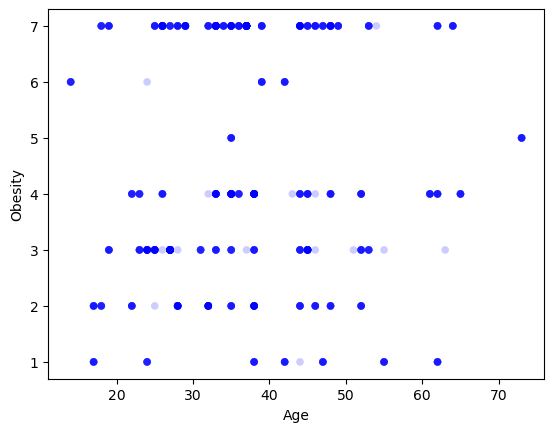

<Figure size 800x600 with 0 Axes>

In [46]:
thinkplot.Scatter(age, obesity)
thinkplot.Show(xlabel='Age', ylabel='Obesity')

In [47]:
def Jitter(values, jitter=0.5):
          n=len(values)
          return np.random.uniform(-jitter, +jitter, n) + values

In [48]:
smokers = thinkstats2.Jitter(smoker)
passiveSmokers = thinkstats2.Jitter(passiveSmoker)
ages = thinkstats2.Jitter(age)
pollutions = thinkstats2.Jitter(pollution)
obesitys = thinkstats2.Jitter(obesity)

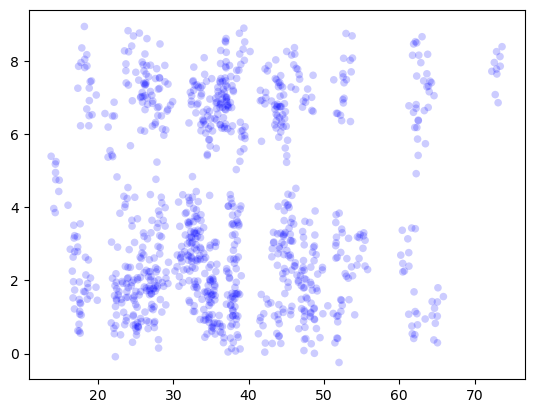

In [49]:
thinkplot.Scatter(ages, smokers, alpha=0.2)

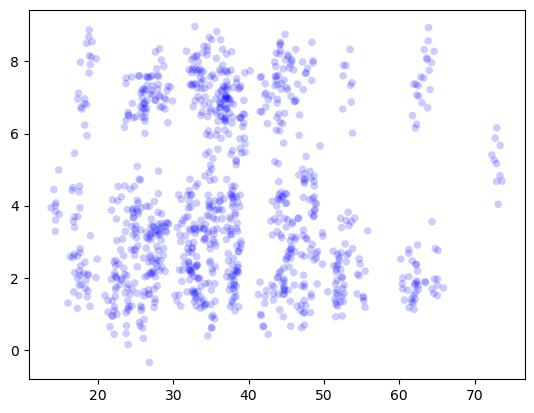

In [50]:
thinkplot.Scatter(ages, passiveSmokers, alpha=0.2)

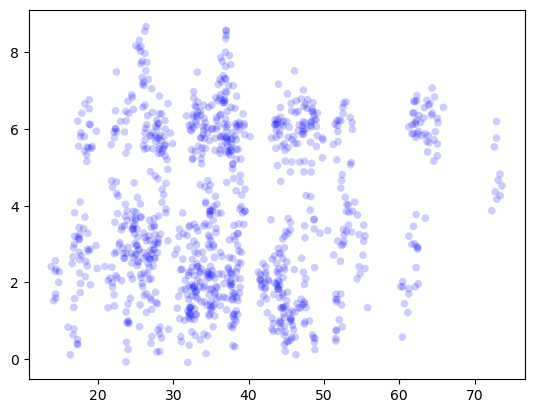

In [51]:
thinkplot.Scatter(ages, pollutions, alpha=0.2)

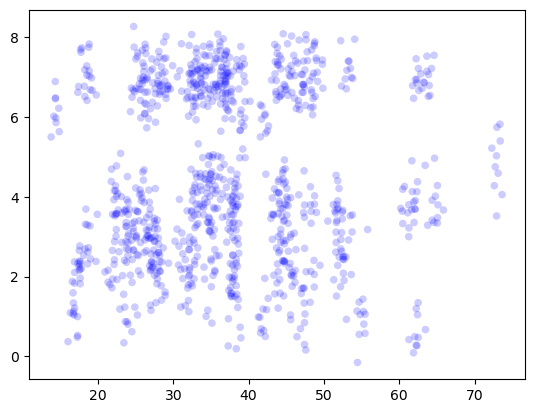

In [52]:
thinkplot.Scatter(ages, obesitys, alpha=0.2)

In [53]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
        
    cov = np.dot(xs-meanx, ys-meany)/len(xs)
    return cov


In [54]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [55]:
Cov(smoker, age)

2.255047999999998

In [56]:
Corr(smoker, age)

0.07533257768327542

In [57]:
Corr(pollution, age)

0.09949419419001267

In [58]:
Corr(obesity, age)

0.03433716261049551

In [59]:
Cov(passiveSmoker, age)

0.13607000000000108

In [60]:
Corr(passiveSmoker, age)

0.004907617514302315

In [61]:
Cov(pollution, age)

2.422840000000002

In [62]:
Cov(obesity, age)

0.8750899999999989

In [63]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [64]:
SpearmanCorr(smoker, age)

0.040816683583760845

In [65]:
SpearmanCorr(passiveSmoker, age)

0.015008644382802867

In [66]:
SpearmanCorr(pollution, age)

0.062103136868118095

In [67]:
SpearmanCorr(obesity, age)

0.06027341535149656

## Hypothesis test

In [68]:
def ChiTest(x):
        observed = x
        n = sum(observed)
        expected = np.ones(1000) * n / 1000
        test_stat = sum((observed - expected)**2 / expected)
        return test_stat

In [69]:
ChiTest(smoker)

1576.3161094224972

In [70]:
ChiTest(passiveSmoker)

1272.6996424314689

In [71]:
ChiTest(age)

3873.344918491413

In [72]:
ChiTest(pollution)

1072.5000000000007

In [73]:
ChiTest(obesity)

1010.2519596864458

## Regression Analysis

In [74]:
import statsmodels.formula.api as smf

formula = 'Smoking ~ Age'
model = smf.ols(formula, data=Data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Smoking   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.696
Date:                Sun, 13 Jul 2025   Prob (F-statistic):             0.0172
Time:                        22:10:32   Log-Likelihood:                -2330.2
No. Observations:                1000   AIC:                             4664.
Df Residuals:                     998   BIC:                             4674.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3658      0.256     13.130      0.000       2.863       3.869
Age            0.0157      0.007      2.387      0.017       0.003       0.029
==============================================================================
Omnibus:                     9623.970   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.895
Skew:                           0.361   Prob(JB):                     3.72e-24
Kurtosis:                       1.562   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
formula = 'Passive_Smoker ~ Age'
model = smf.ols(formula, data=Data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Passive_Smoker   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02404
Date:                Sun, 13 Jul 2025   Prob (F-statistic):              0.877
Time:                        22:10:32   Log-Likelihood:                -2256.4
No. Observations:                1000   AIC:                             4517.
Df Residuals:                     998   BIC:                             4527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1599      0.238     17.471      0.000       3.693       4.627
Age            0.0009      0.006      0.155      0.877      -0.011       0.013
==============================================================================
Omnibus:                     3808.317   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.593
Skew:                           0.411   Prob(JB):                     8.70e-23
Kurtosis:                       1.672   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
formula = 'Air_Pollution ~ Age'
model = smf.ols(formula, data=Data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Air_Pollution   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.978
Date:                Sun, 13 Jul 2025   Prob (F-statistic):            0.00163
Time:                        22:10:32   Log-Likelihood:                -2121.7
No. Observations:                1000   AIC:                             4247.
Df Residuals:                     998   BIC:                             4257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2145      0.208     15.448      0.000       2.806       3.623
Age            0.0168      0.005      3.159      0.002       0.006       0.027
==============================================================================
Omnibus:                     2340.182   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.644
Skew:                           0.128   Prob(JB):                     1.02e-16
Kurtosis:                       1.695   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
formula = 'Obesity ~ Age'
model = smf.ols(formula, data=Data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Obesity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.178
Date:                Sun, 13 Jul 2025   Prob (F-statistic):              0.278
Time:                        22:10:32   Log-Likelihood:                -2171.6
No. Observations:                1000   AIC:                             4347.
Df Residuals:                     998   BIC:                             4357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2391      0.219     19.381      0.000       3.810       4.668
Age            0.0061      0.006      1.085      0.278      -0.005       0.017
==============================================================================
Omnibus:                     8410.728   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.148
Skew:                           0.030   Prob(JB):                     4.38e-20
Kurtosis:                       1.539   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""